# Problem Statement
Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.) Tenure information (joining date, Last Date) Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# About the data

Column Profiling:

• MMMM-YY : Reporting Date (Monthly) (date-time)

• Age : Age of the employee (numerical)

• Gender : Gender of the employee – Male : 0, Female: 1 (categorical)

• City : City Code of the employee (categorical)

• Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate (categorical)

• Income : Monthly average Income of the employee (numerical)

• Date Of Joining : Joining date for the employee (date-time)

• LastWorkingDate : Last date of working for the employee - Target Feature (date-time, but will be converted to categorical)

• Joining Designation : Designation of the employee at the time of joining (categorical, ordinal)

• Grade : Grade of the employee at the time of reporting (categorical, ordinal)

• Total Business Value : The total business value acquired by the employee in a month (negative business indicates cancellation/refund or car EMI adjustments) (numerical)

• Quarterly Rating : Quarterly rating of the employee: 1,2,3,4,5 (categorical, ordinal - higher is better)

# Importing Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Exploring Data

In [2]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [3]:
#dropping the unnamed column
df.drop('Unnamed: 0' , axis=1 , inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

- Null values are present


In [6]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [8]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

# Data Preprocessing and Feature Engineering

In [9]:
df1 = df.copy(deep=True)

In [10]:
# Target variable creation: Creating a column called target which tells whether the driver has left the company
# Driver whose last working day is present will have the value 1

first = (df1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [11]:
# Creating a column which tells whether the quarterly rating has increased for that driver - 
# for those whose quarterly rating has increased we assign the value 1

# Calculating the first quarterly rating for each driver
QR1 = df1.groupby('Driver_ID')['Quarterly Rating'].first().reset_index()

# Calculating the last quarterly rating for each driver
QR2 = df1.groupby('Driver_ID')['Quarterly Rating'].last().reset_index()

# Merging the two DataFrames on 'Driver_ID'
merged_ratings = pd.merge(QR1, QR2, on='Driver_ID', suffixes=('_first', '_last'))

# Create a new column 'Rating_Increase' to indicate if the rating has increased
merged_ratings['Rating_Increase'] = (merged_ratings['Quarterly Rating_last'] > merged_ratings['Quarterly Rating_first']).astype(int)

print(merged_ratings.head())


   Driver_ID  Quarterly Rating_first  Quarterly Rating_last  Rating_Increase
0          1                       2                      2                0
1          2                       1                      1                0
2          4                       1                      1                0
3          5                       1                      1                0
4          6                       1                      2                1


In [12]:
# Creating a column which tells whether the monthly income has increased for that driver - 
# for those whose monthly income has increased we assign the value 1

# Calculating the first monthly income for each driver
incm1 = df1.groupby('Driver_ID')['Income'].first().reset_index()

# Calculating the last monthly income for each driver
incm2 = df1.groupby('Driver_ID')['Income'].last().reset_index()

# Merging the two DataFrames on 'Driver_ID'
merged_income = pd.merge(incm1, incm2, on='Driver_ID', suffixes=('_first', '_last'))

# Creating a new column 'Income_Increase' to indicate if the income has increased
merged_income['Income_Increase'] = (merged_income['Income_last'] > merged_income['Income_first']).astype(int)

print(merged_income.head())


   Driver_ID  Income_first  Income_last  Income_Increase
0          1         57387        57387                0
1          2         67016        67016                0
2          4         65603        65603                0
3          5         46368        46368                0
4          6         78728        78728                0


In [13]:
# Merging the merged_ratings and merged_income dataframe with df1

first = pd.merge(first, merged_ratings, on='Driver_ID', how='left')
first = pd.merge(first, merged_income, on='Driver_ID', how='left')
first.head()

,Driver_ID,target,Quarterly Rating_first,Quarterly Rating_last,Rating_Increase,Income_first,Income_last,Income_Increase
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [14]:
first = first[['Driver_ID','target','Rating_Increase','Income_Increase']]

In [15]:
first.head()

,Driver_ID,target,Rating_Increase,Income_Increase
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,1,0


In [16]:
functions = {'MMM-YY': 'count',
             'Age': 'max',
             'Gender': 'last',
             'City': 'last',
             'Education_Level': 'last',
             'Dateofjoining': 'first',
             'LastWorkingDate': 'last',
             'Grade': 'last',
             'Total Business Value': 'sum',
             'Income': 'sum',
             'Joining Designation': 'last',
             'Quarterly Rating': 'first'}

df1 = df1.groupby('Driver_ID').agg(functions).reset_index()

df1['month'] = pd.to_datetime(df1['Dateofjoining']).dt.month
df1['year'] = pd.DatetimeIndex(df1['Dateofjoining']).year

df1.rename(columns={'MMM-YY': 'Reportings'}, inplace=True)


In [17]:
df1.reset_index(drop=True, inplace=True)
df1 = df1.merge(first,on='Driver_ID')
df1.head()

,Driver_ID,Reportings,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Rating_Increase,Income_Increase
0,1,3,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020,1,0,0
2,4,5,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019,0,0,0
3,5,3,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019,0,0,0
4,6,5,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,7,2020,1,1,0


In [18]:
df1['Age'] = df1['Age'].astype('int64')

# Extracting numeric values from 'City' column and sum them up
df1['Cities'] = df1['City'].str.extractall('(\d+)').astype(float).unstack().fillna(0).sum(axis=1).astype(int)

df1.head()


,Driver_ID,Reportings,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Rating_Increase,Income_Increase,Cities
0,1,3,28,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0.0,C7,2,11/06/20,None,2,0,134032,2,1,11,2020,1,0,0,7
2,4,5,43,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,12,2019,0,0,0,13
3,5,3,29,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,1,2019,0,0,0,9
4,6,5,31,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,7,2020,1,1,0,11


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2381 non-null   int64  
 1   Reportings            2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int32  
 14  year                  2381 non-null   int32  
 15  target               

In [20]:
df1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
df1['Gender'].replace({'M':0,'F':1},inplace=True)
df1['Gender'] = df1['Gender'].astype('int64')

In [21]:
df1.head()

,Driver_ID,Reportings,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Rating_Increase,Income_Increase,Cities
0,1,3,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,11,2020,1,0,0,7
2,4,5,43,0,2,2,350000,328015,2,1,12,2019,0,0,0,13
3,5,3,29,0,0,1,120360,139104,1,1,1,2019,0,0,0,9
4,6,5,31,1,1,3,1265000,393640,3,1,7,2020,1,1,0,11


In [22]:
df1.isnull().sum()

Driver_ID               0
Reportings              0
Age                     0
Gender                  0
Education_Level         0
Grade                   0
Total Business Value    0
Income                  0
Joining Designation     0
Quarterly Rating        0
month                   0
year                    0
target                  0
Rating_Increase         0
Income_Increase         0
Cities                  0
dtype: int64

In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


# Exploratory Data Analysis

## Univariate

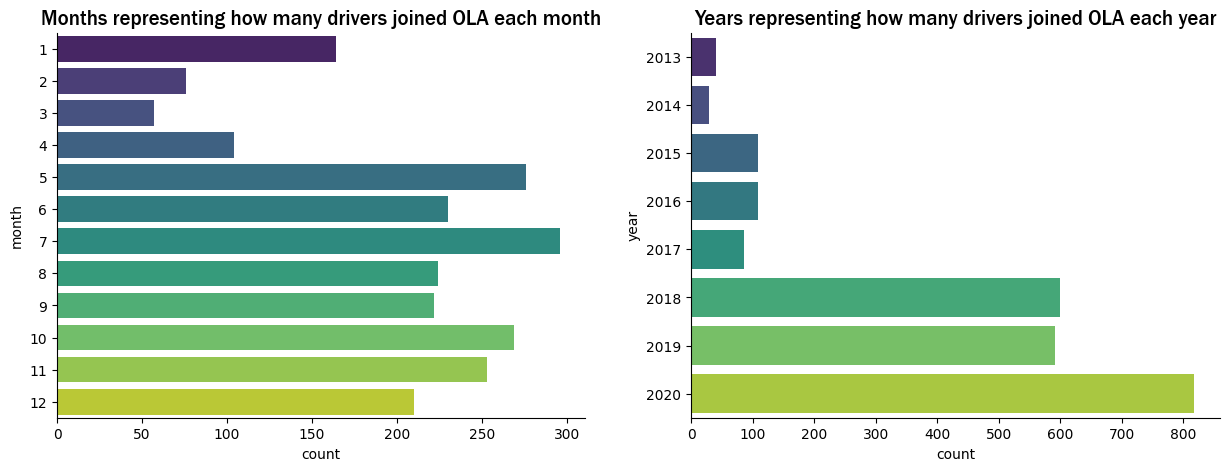

In [24]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=df1.month,palette='viridis')
plt.title('Months representing how many drivers joined OLA each month',fontname='Franklin Gothic Medium', fontsize=15)


ax = fig.add_subplot(1,2,2)
sns.countplot(y=df1.year,palette='viridis')
plt.title('Years representing how many drivers joined OLA each year',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

 Insights:
- July received the maximum number of drivers in 8 years.
- February and March receives the least number of Drivers joining OLA.
- Joining of Drivers receives a boost of about 500% after 2017.

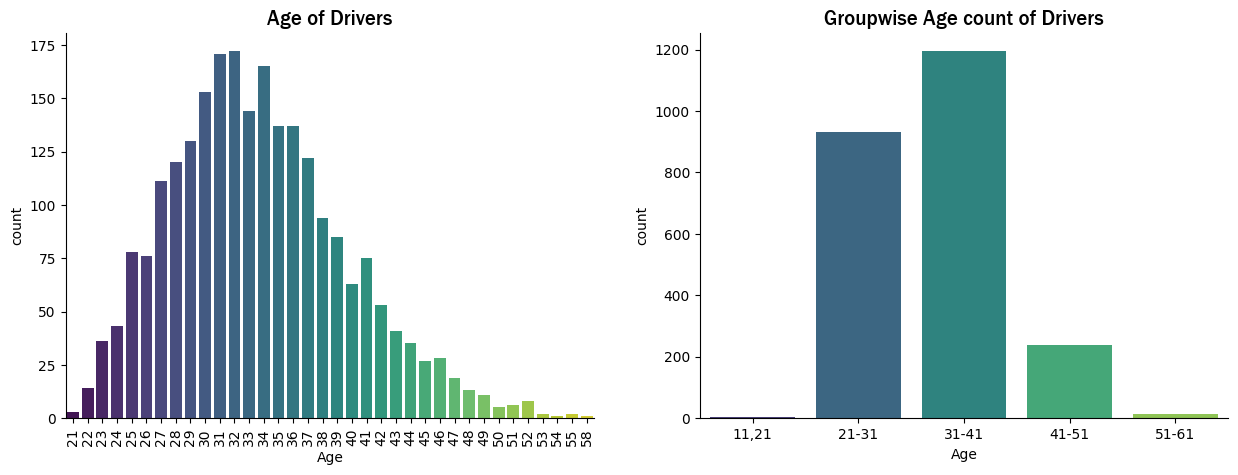

In [25]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
sns.countplot(x=df1.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(df1.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

Insights:
- Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years.

- The age group between 31-41 years of age receives the maximum number of drivers.

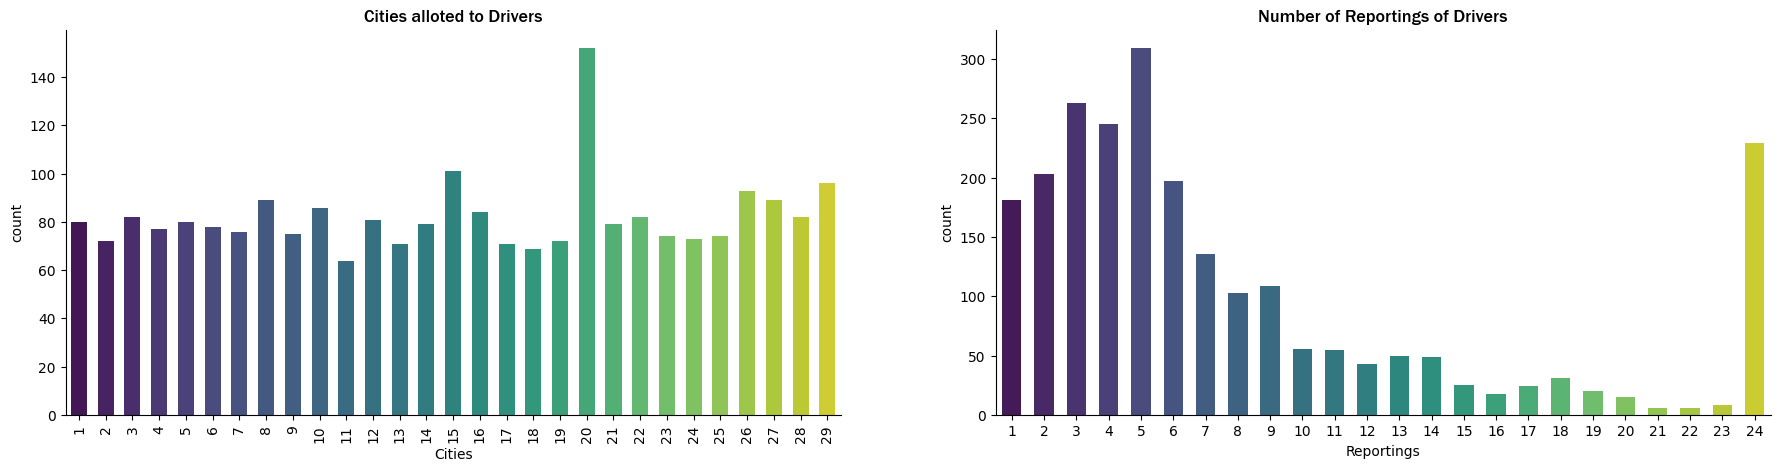

In [26]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=df1.Cities,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df1.Reportings,palette='viridis',width=0.6)
plt.title('Number of Reportings of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
          
sns.despine()
plt.show()

Insights;
- City C20 has been used by the most of the drivers.
- We can observe the distribution of the number of reportings for each driver. It helps in understanding the frequency of reporting by drivers and whether there are any patterns or outliers in the reporting behavior.

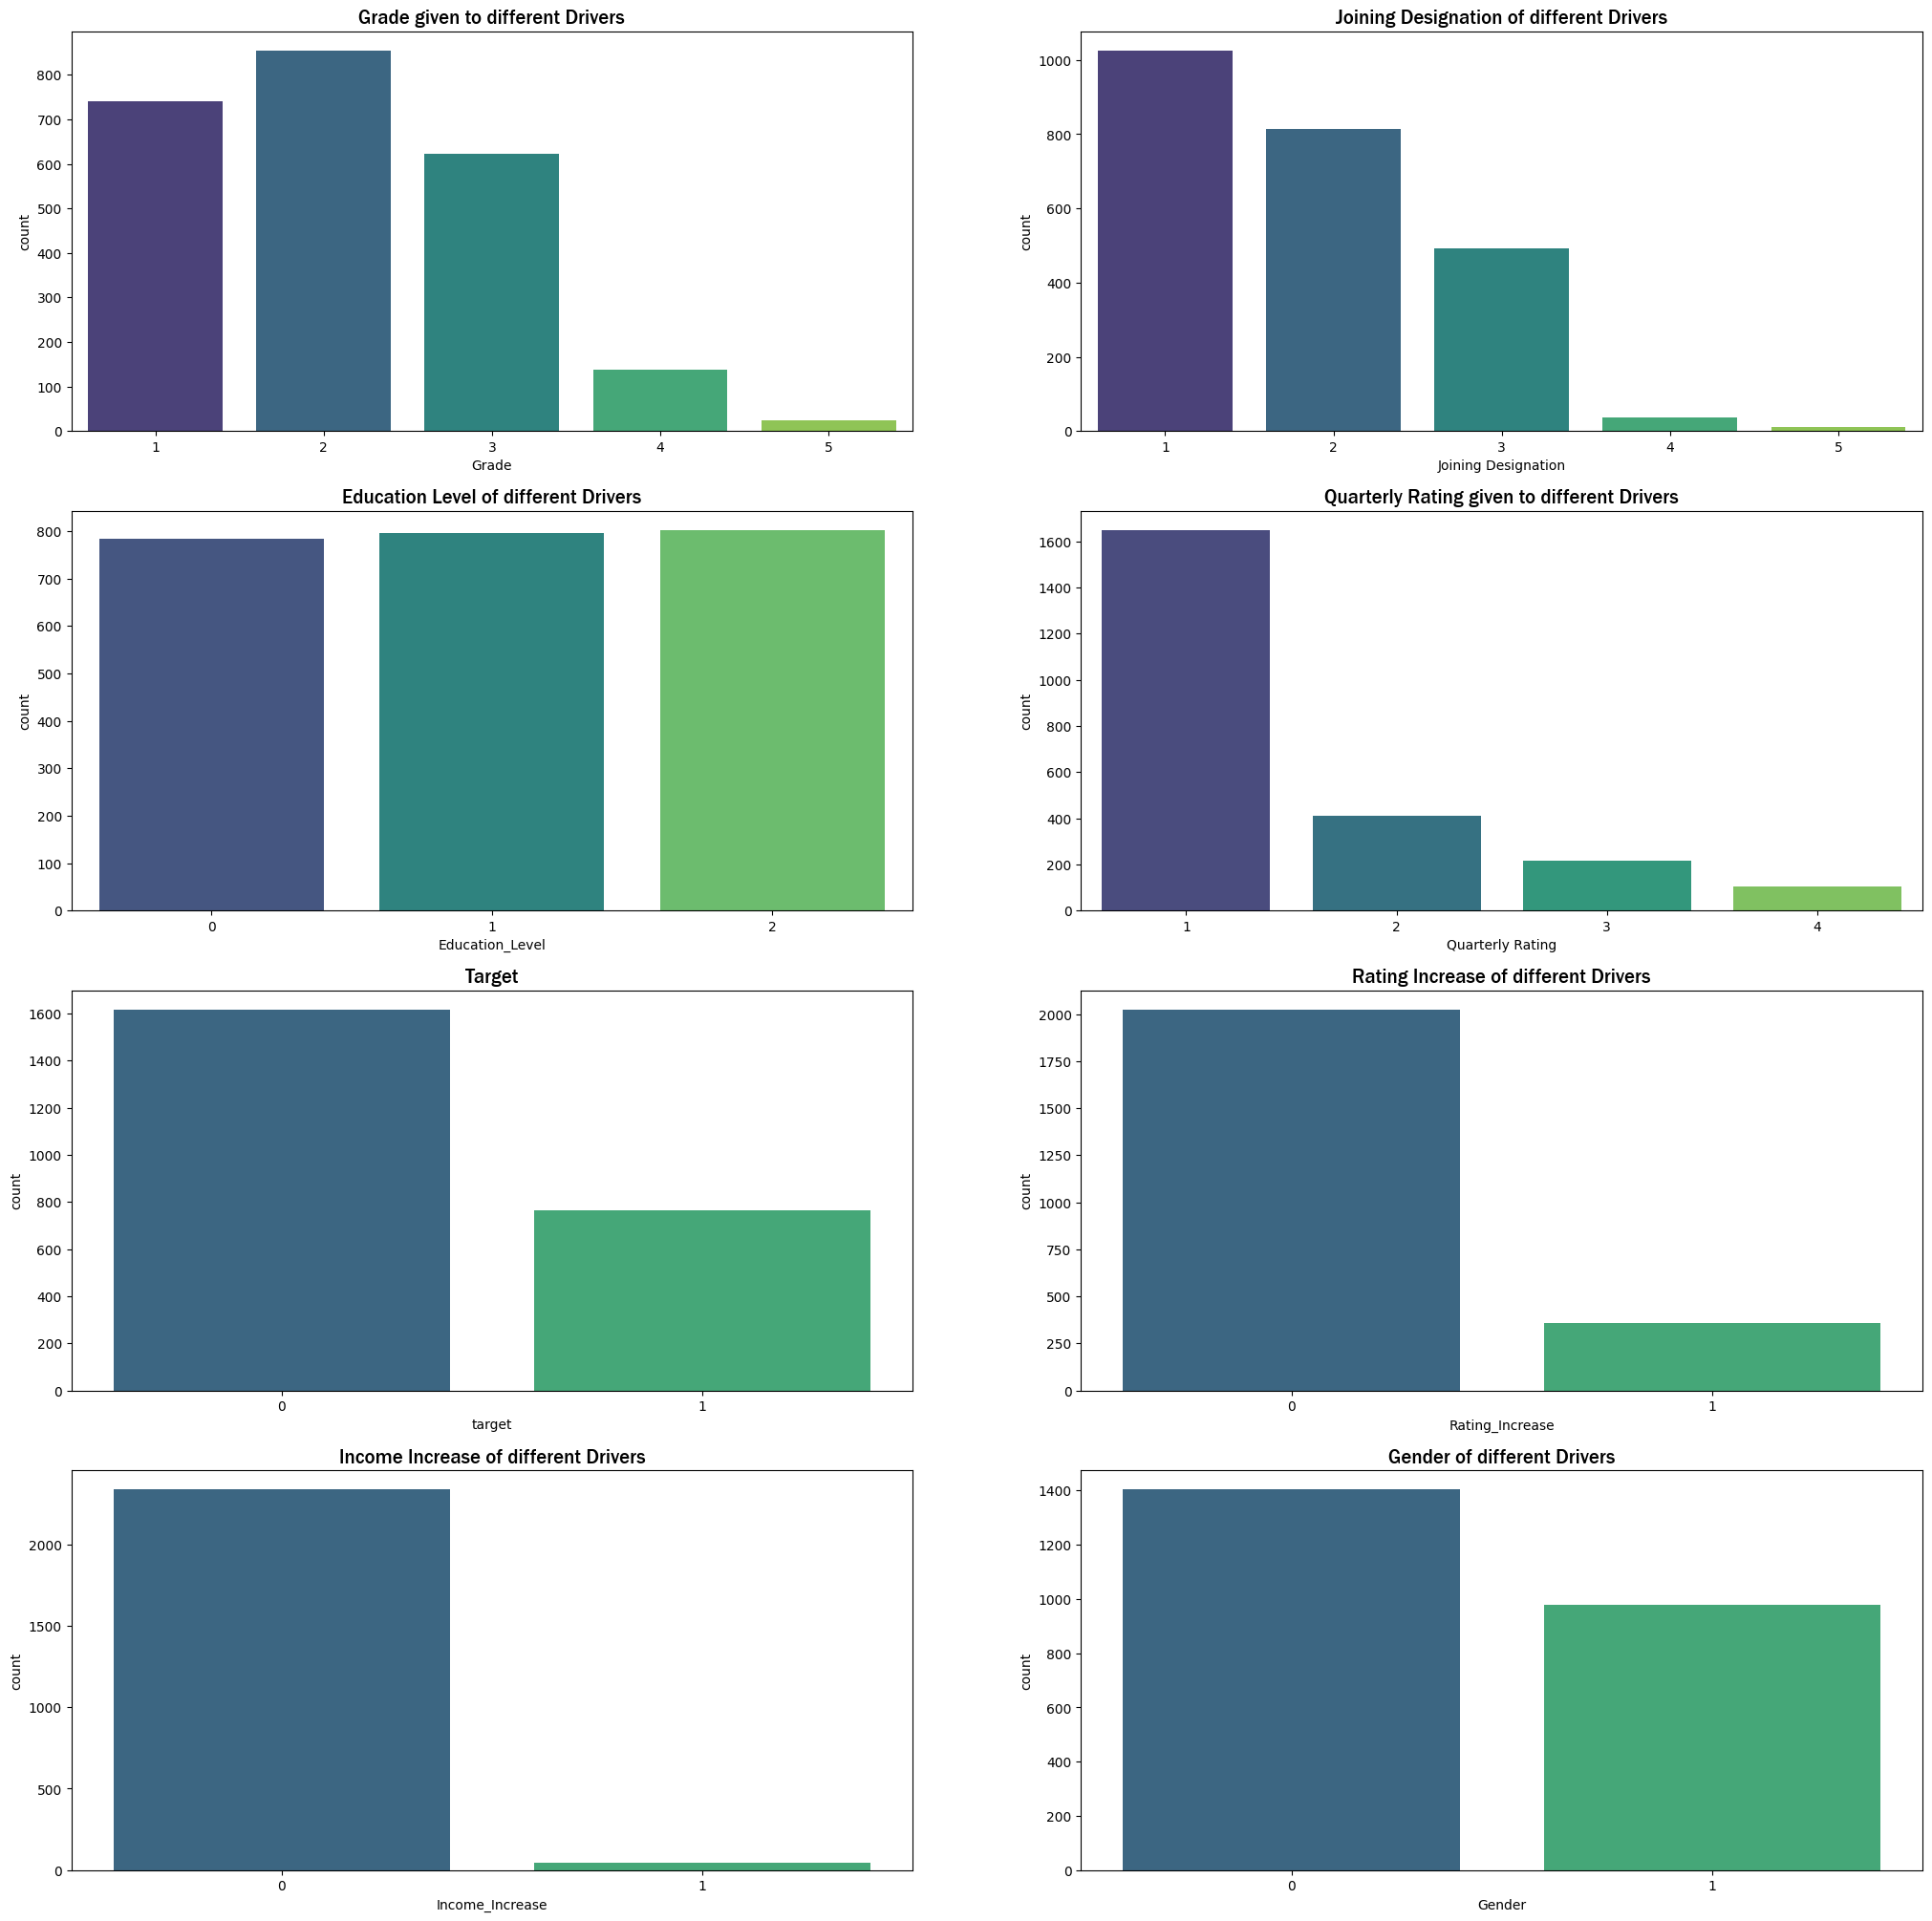

In [27]:
plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.countplot(x=df1.Grade,palette='viridis')
plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,2)
sns.countplot(x=df1['Joining Designation'],palette='viridis')
plt.title('Joining Designation of different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,3)
sns.countplot(x=df1.Education_Level,palette='viridis')
plt.title('Education Level of different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,4)
sns.countplot(x=df1['Quarterly Rating'],palette='viridis')
plt.title('Quarterly Rating given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,5)
sns.countplot(x=df1.target,palette='viridis')
plt.title('Target',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,6)
sns.countplot(x=df1.Rating_Increase,palette='viridis')
plt.title('Rating Increase of different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,7)
sns.countplot(x=df1.Income_Increase,palette='viridis')
plt.title('Income Increase of different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

plt.subplot(4,2,8)
sns.countplot(x=df1.Gender,palette='viridis')
plt.title('Gender of different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.show()

Insights:
- Grade 2 has been received by most of the Drivers and then the count of grade keeps on falling.
- There are 3 Education levels and all of them alomst have the equal distribution of Drivers.


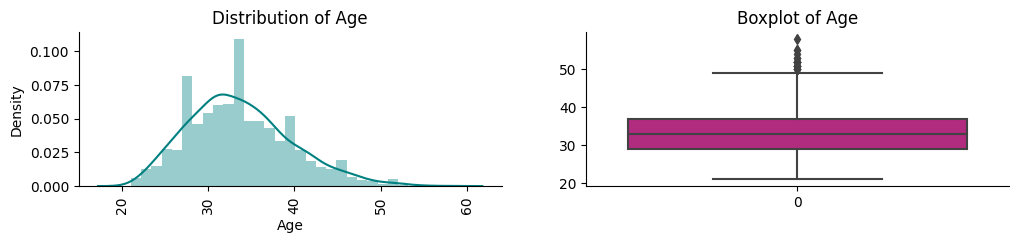

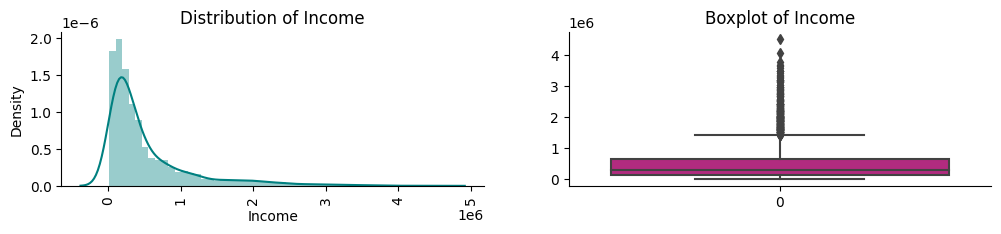

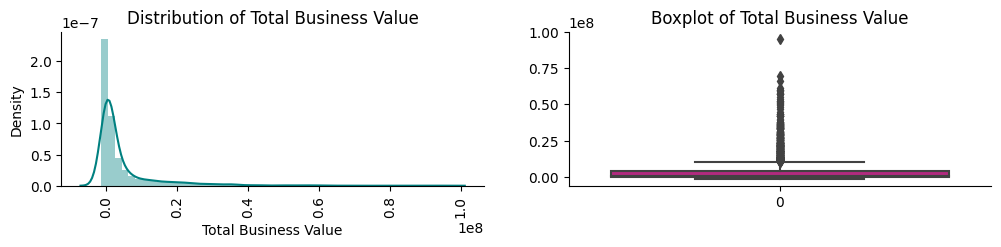

In [28]:
a = df1[['Age', 'Income', 'Total Business Value']]

for i in a:
    plt.figure(figsize=(12, 2))
    
    plt.subplot(121)
    sns.distplot(a[i], color='teal')
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=90)
    
    plt.subplot(122)
    sns.boxplot(a[i], color='mediumvioletred')
    plt.title(f'Boxplot of {i}')
    sns.despine()

    plt.show()

Insights:
- Distribution of age and income is Normal distribution.
- Distribution of Total Business Value is Right Skewed.
- As we can notice Total Business Value column and income has some negative and higher values.
- We consider them as outlier which will affect the results of the our machine learning model.

# Bivariate and multivariate

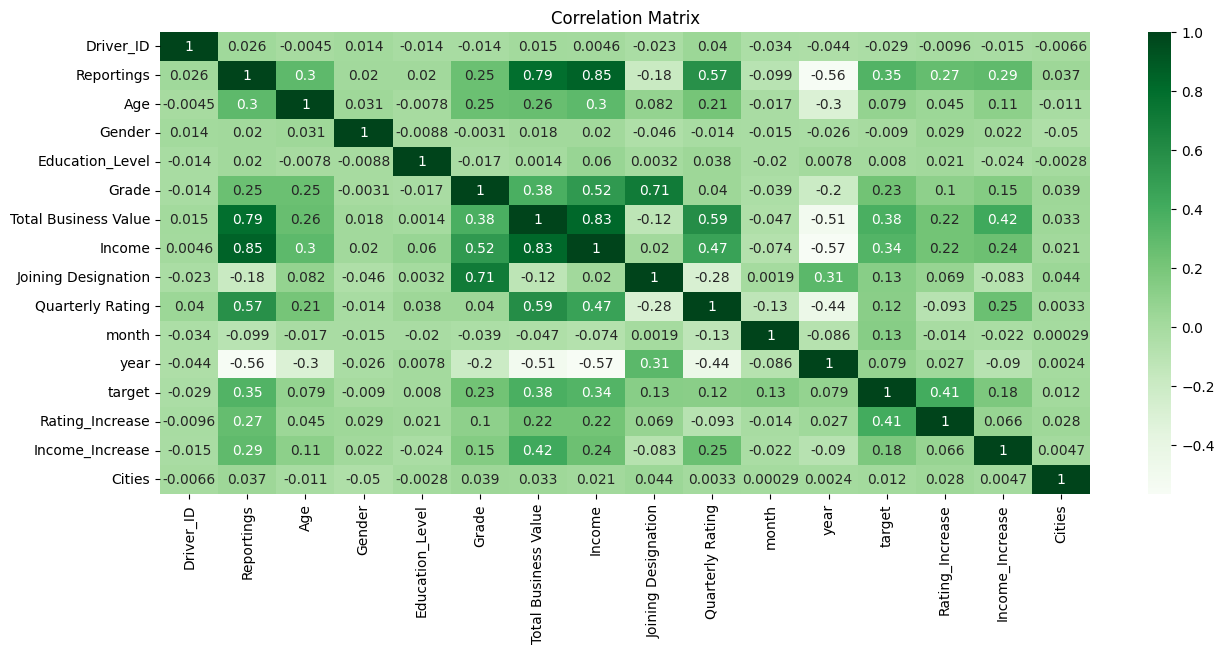

In [29]:
corr = df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

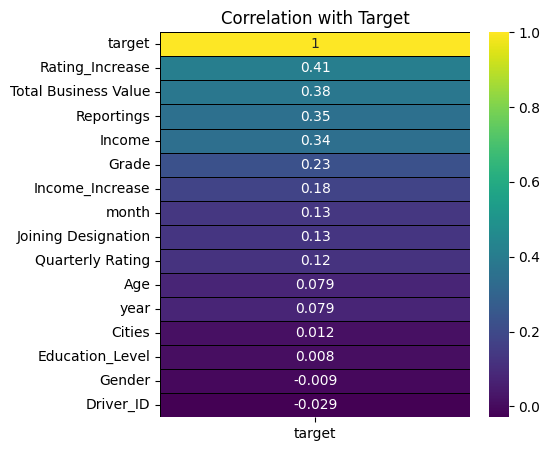

In [30]:
# Calculating correlation matrix with Target
corr = df1.corr()['target'].sort_values(ascending=False).to_frame()
corr.columns = ['target']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.4, linecolor='black')
plt.title('Correlation with Target')
plt.show()

Insights:
- Values which are closed to 1 are showing positive correlation and values which are closed to -1 are showing negative correaltions.
- Rating increase , Total Business Value , Reportings , Income shows positive correaltion with target.
- Cities , Education level , Gender , Driver id shows negative correaltion with target.

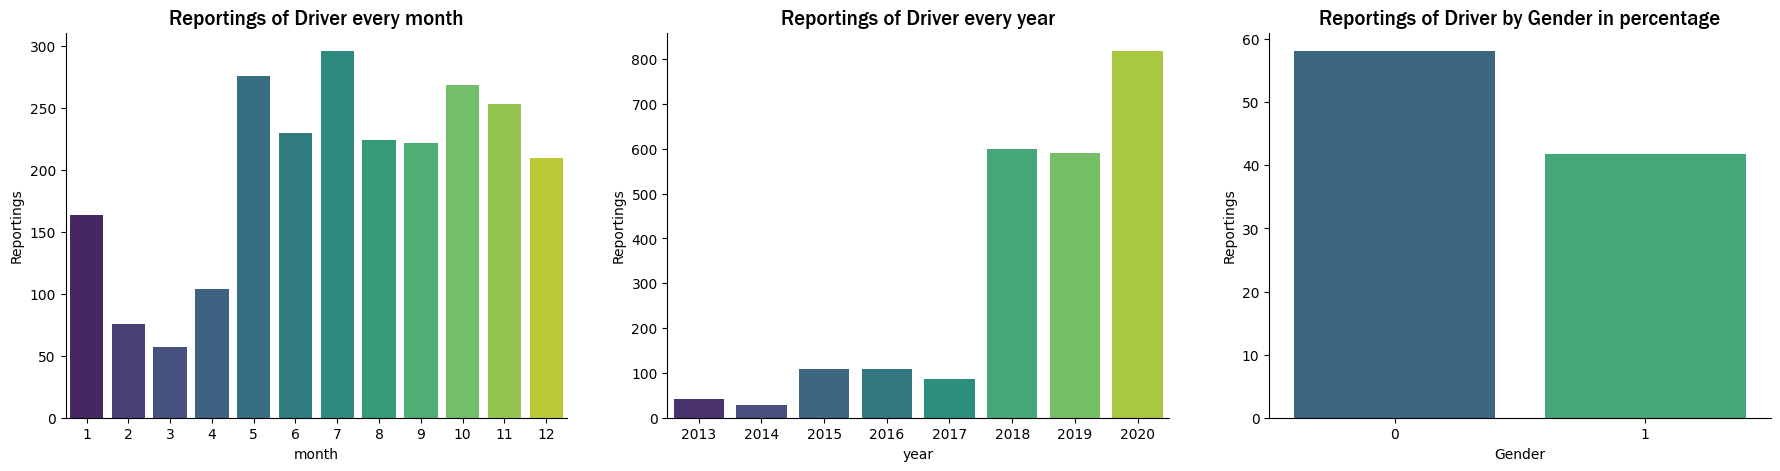

In [31]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,3,1)
grouped_months = df1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
plt.title('Reportings of Driver every month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,2)
grouped_years = df1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
plt.title('Reportings of Driver every year',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,3,3)
grouped_gender = df1.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings'] =(grouped_gender['Reportings']/sum(df1
                                                                .Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')
plt.title('Reportings of Driver by Gender in percentage',fontname='Franklin Gothic Medium', fontsize=15)

sns.despine()
plt.show()

In [32]:
grouped_gender

,Gender,Reportings
0,0,58.12
1,1,41.88


Insights:
- Reporting of drivers in Feb and March is less as compared to other months.
- After 2017 Reporting of driver is increased.
- So we see that there are 58% male employees and 42% female employees.
- Male reporting driver is high as compared to female.


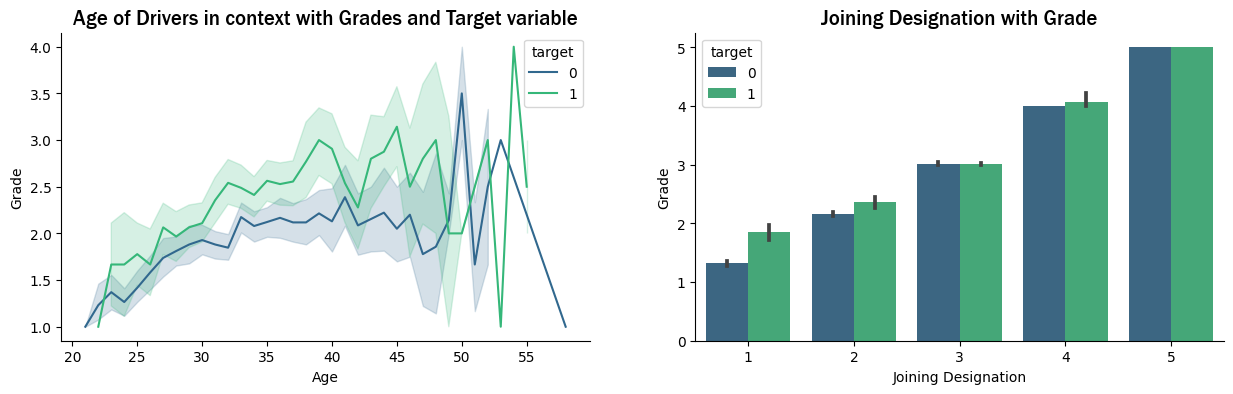

In [33]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=df1.Age,y=df1.Grade,hue=df1.target,palette='viridis')
plt.title('Age of Drivers in context with Grades and Target variable',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=df1, x="Joining Designation", y="Grade",palette='viridis',hue='target')
plt.title('Joining Designation with Grade',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

Insights:
- The left plot provides insight into how the age of drivers correlates with their grade, while also considering the target variable. It can help in understanding any patterns or trends in the distribution of grades among different age groups of drivers.
- The right plot visualizes the relationship between the joining designation of drivers and their grade, considering the target variable as well. It allows us to see how the joining designation affects the grade of drivers and whether there are any differences based on the target variable.



- Joining Designation Increases with increase in Grade.


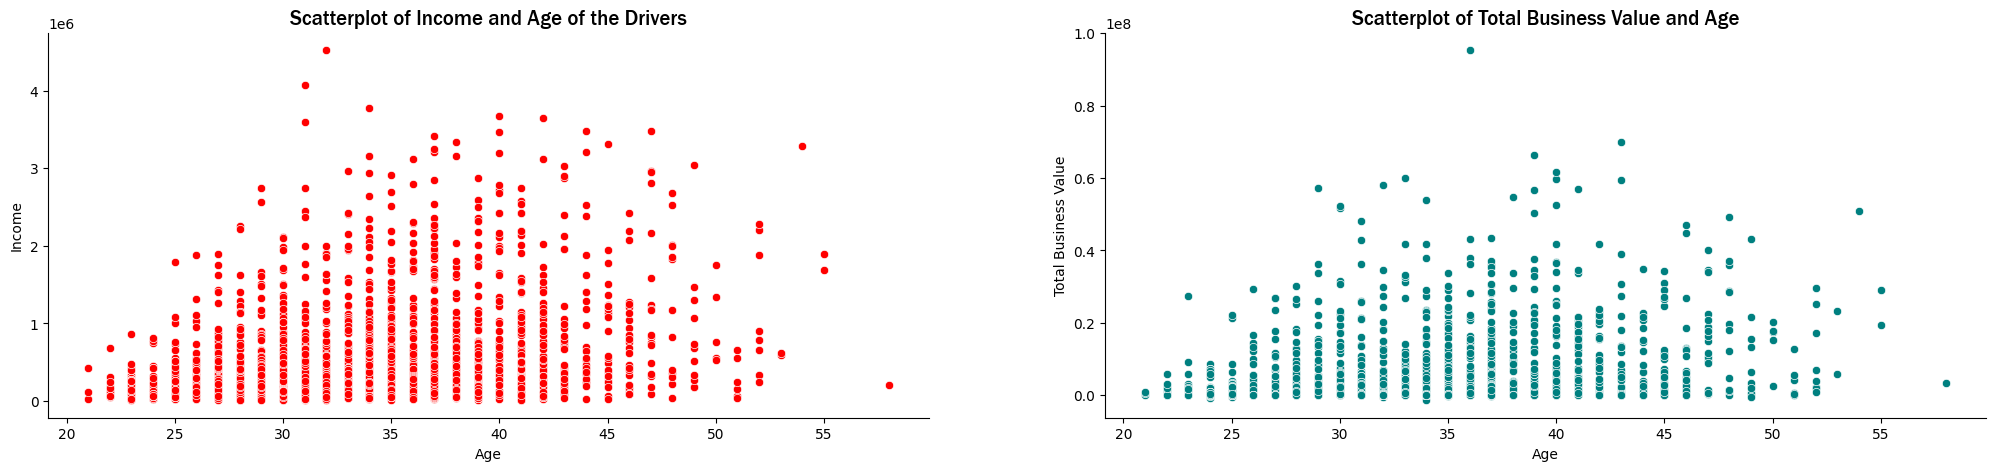

In [34]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df1.Age,y=df1.Income,color='red')
plt.title('Scatterplot of Income and Age of the Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x=df1.Age,y=df1['Total Business Value'],color='teal')
plt.title('Scatterplot of Total Business Value and Age',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

Insights:
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.


In [35]:
grouped_gender = df1.groupby('Gender')['Income'].sum().reset_index()
grouped_education = df1.groupby('Education_Level')['Income'].sum().reset_index()
grouped_grade = df1.groupby('Grade')['Income'].sum().reset_index()
grouped_desig = df1.groupby('Joining Designation')['Income'].sum().reset_index()
grouped_QR = df1.groupby('Quarterly Rating')['Income'].sum().reset_index()
grouped_target = df1.groupby('target')['Income'].sum().reset_index()
grouped_rating = df1.groupby('Rating_Increase')['Income'].sum().reset_index()
grouped_income = df1.groupby('Income_Increase')['Income'].sum().reset_index() 

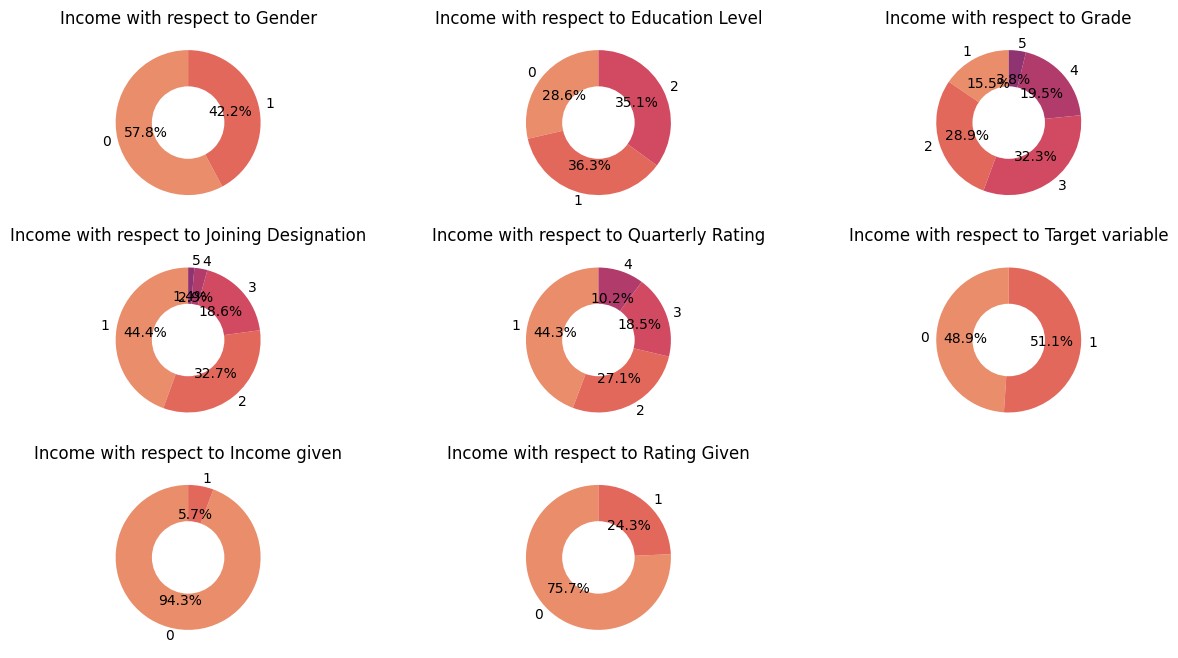

In [36]:
plt.figure(figsize=(15,8))

plt.subplot(3,3,1)
plt.pie(grouped_gender['Income'], labels=grouped_gender['Gender'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Gender')

plt.subplot(3,3,2)
plt.pie(grouped_education['Income'], labels=grouped_education['Education_Level'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Education Level')

plt.subplot(3,3,3)
plt.pie(grouped_grade['Income'], labels=grouped_grade['Grade'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Grade')

plt.subplot(3,3,4)
plt.pie(grouped_desig['Income'], labels=grouped_desig['Joining Designation'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Joining Designation')

plt.subplot(3,3,5)
plt.pie(grouped_QR['Income'], labels=grouped_QR['Quarterly Rating'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Quarterly Rating')

plt.subplot(3,3,6)
plt.pie(grouped_target['Income'], labels=grouped_target['target'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Target variable')

plt.subplot(3,3,7)
plt.pie(grouped_income['Income'], labels=grouped_income['Income_Increase'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Income given')

plt.subplot(3,3,8)
plt.pie(grouped_rating['Income'], labels=grouped_rating['Rating_Increase'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Rating Given')

sns.despine()
plt.show()


Insights:
- So we see that there are 57% male employees and 43% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- Almost 44% of the employees joined at designation (1). 32.7% joined at level 2, 18.6% at level 3 and below 2% joined at higher levels.
- Only 24.3% of the employees received a promotion , while 75.7% did not. 
- 94.3% of the employees who did not get a raise in Income , only 2.6% received a raise in income.
- 51.1% are leaving with respect to income.



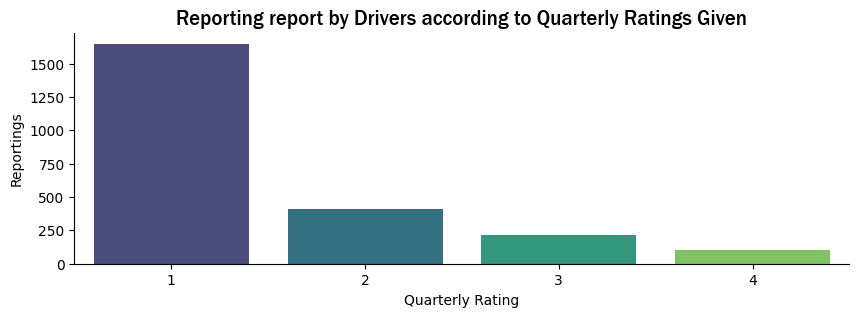

In [37]:
plt.figure(figsize=(10,3))

grouped_rating = df1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()


- About 55% of the reportings of the drivers has got Quarlerly Rating 1.


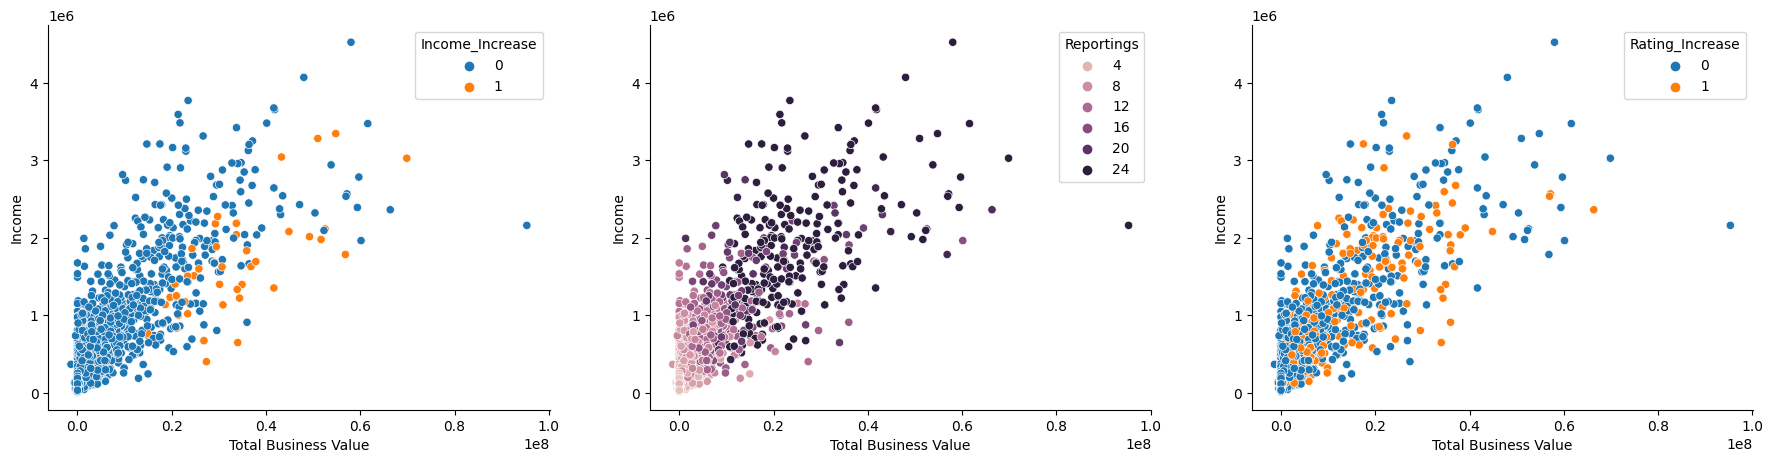

In [38]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Income_Increase)

plt.subplot(1,3,2)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Reportings)

plt.subplot(1,3,3)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Rating_Increase)

sns.despine()
plt.show()

# Outlier Treatment:

In [39]:
for col in ['Income', 'Total Business Value']:
  mean = df1[col].mean()
  std = df1[col].std()
    
  q1 = np.percentile(df1[col], 25)
  q2 = np.percentile(df1[col], 50)
  q3 = np.percentile(df1[col], 75)

  IQR = q3-q1
    
  lower_limt, upper_limit = q1-1.5*IQR , q3+1.5*IQR
  df1[col] = df1[col].apply(lambda x: lower_limt if x < lower_limt else x)
  df1[col] = df1[col].apply(lambda x: upper_limit if x > upper_limit else x)
df1.shape

(2381, 16)

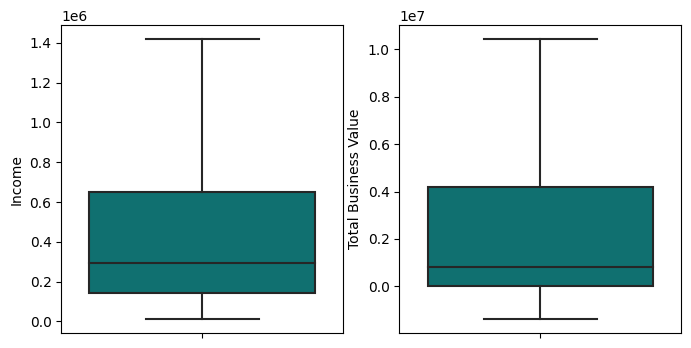

In [40]:
outliers = ['Income', 'Total Business Value']
count = 0
plt.figure(figsize=(8,4))
for i in outliers:
    count += 1
    plt.subplot(1,2,count)
    sns.boxplot(y= df1[i],color='teal')

- In this outliers we will make the values that are more than upperwiskuss and lowerwiskuss to inside the range.
- If we do that what happens is that all the values from total business value will compress and the mean value 0 will be shifted from 0 to higher value so that will also affect the output.
- Even if we drop the null values then also we won't be left with more number of values.
- So in this case its better to not treat.

# Train-Test Split:

In [41]:
from sklearn.model_selection import train_test_split

X = df1.drop('target',axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

- Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [42]:
#Scalling the data 

from sklearn.preprocessing import MinMaxScaler, StandardScaler

ss= StandardScaler()
ss.fit_transform(X_train)

array([[-1.0816992 , -0.89285812, -0.96409437, ..., -0.4264676 ,
        -0.13684514, -0.64358249],
       [ 0.78873533, -0.45183377,  0.03470985, ..., -0.4264676 ,
        -0.13684514,  0.54714831],
       [ 0.94728872, -0.89285812, -1.13056174, ..., -0.4264676 ,
        -0.13684514, -0.76265557],
       ...,
       [-0.09445661, -0.30482565,  0.86704669, ..., -0.4264676 ,
        -0.13684514, -1.00080173],
       [ 0.14089608, -1.03986624, -0.46469226, ..., -0.4264676 ,
        -0.13684514,  0.54714831],
       [-0.49084008, -0.59884189, -0.46469226, ..., -0.4264676 ,
        -0.13684514, -0.40543633]])

# MACHINE LEARNING MODEL :
- WITHOUT THE TREATMENT OF CLASS IMBALANCE

The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -

If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave. • If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [44]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    
    accuracy =classifier.score(x_test,y_test)
    print("Accuracy is :",accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

    

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    plt.figure(figsize=(4,3))
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression



Accuracy is : 0.7232704402515723
Cross Validation Score :  67.79%
ROC_AUC Score :  62.13%
--------------------------------------------------------------------------------


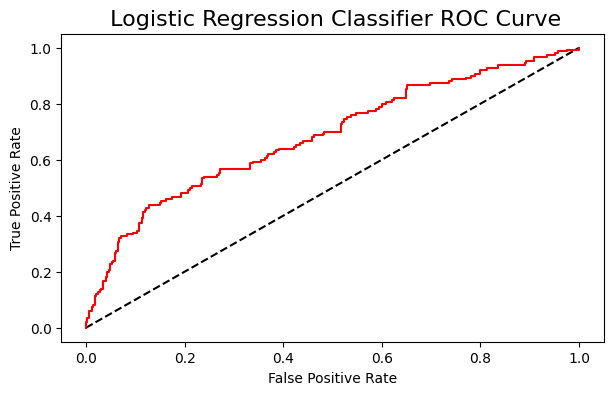

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       327
           1       0.60      0.35      0.44       150

    accuracy                           0.72       477
   macro avg       0.68      0.62      0.63       477
weighted avg       0.70      0.72      0.70       477



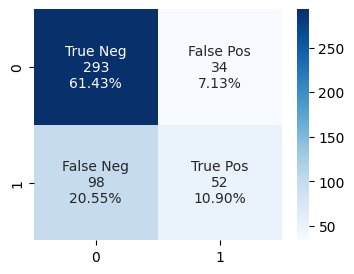

In [45]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,X_train,y_train,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,X_test,y_test)

## Decision Tree 

Accuracy is : 0.909853249475891
Cross Validation Score :  94.54%
ROC_AUC Score :  90.36%
--------------------------------------------------------------------------------


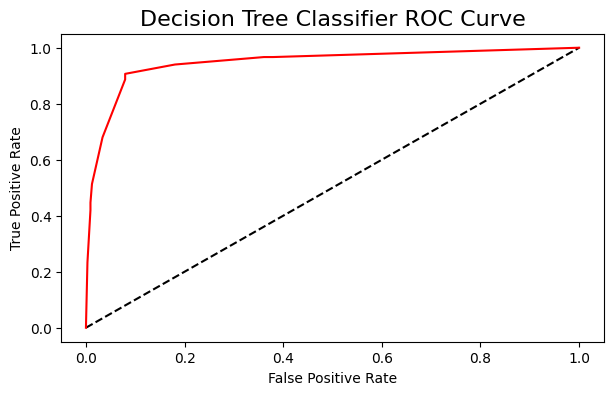

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       327
           1       0.84      0.89      0.86       150

    accuracy                           0.91       477
   macro avg       0.89      0.90      0.90       477
weighted avg       0.91      0.91      0.91       477



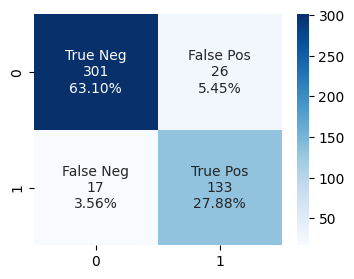

In [46]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,X_train,y_train,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,X_test,y_test)

## Random Forest 

Accuracy is : 0.8658280922431866
Cross Validation Score :  95.70%
ROC_AUC Score :  80.11%
--------------------------------------------------------------------------------


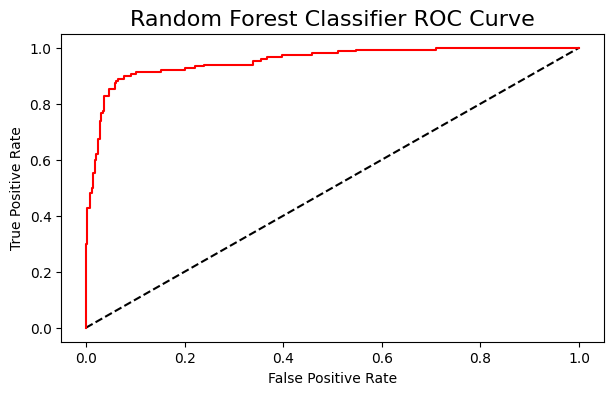

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       327
           1       0.92      0.63      0.75       150

    accuracy                           0.87       477
   macro avg       0.89      0.80      0.83       477
weighted avg       0.87      0.87      0.86       477



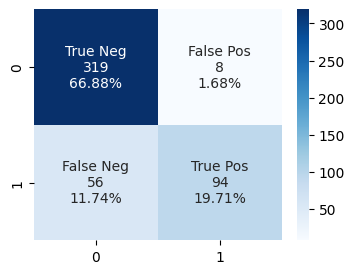

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,X_train,y_train,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,X_test,y_test)

## Result Table

In [48]:
data = {
    'ML Algorithm': ['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [86.58, 90.98, 72.32],
    'Cross Validation Score': [95.70, 94.54, 67.79],
    'ROC AUC Score': [80.11, 90.36, 62.13],
    'F1 Score (Churn)': [75, 86, 44]
}

results_df = pd.DataFrame(data)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,RandomForestClassifier,86.58,95.70,80.11,75
1,DecisionTreeClassifier,90.98,94.54,90.36,86
2,LogisticRegressionClassifier,72.32,67.79,62.13,44


## Feature Importance:

In [49]:
rf_clf_imp1 = classifier_rf.feature_importances_
dt_clf_imp1 = classifier_dt.feature_importances_
data1 = pd.DataFrame({'Column_Name':X_train.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'DecisionTree':dt_clf_imp1})

data1

,Column_Name,RandomForestClassifier,DecisionTree
0,Driver_ID,0.006324,0.006420
1,Reportings,0.229654,0.357803
2,Age,0.007443,0.000000
3,Gender,0.001065,0.000000
4,Education_Level,0.000903,0.000000
5,Grade,0.021387,0.000000
6,Total Business Value,0.162238,0.110208
7,Income,0.103080,0.000000
8,Joining Designation,0.025347,0.000000
9,Quarterly Rating,0.009461,0.000000


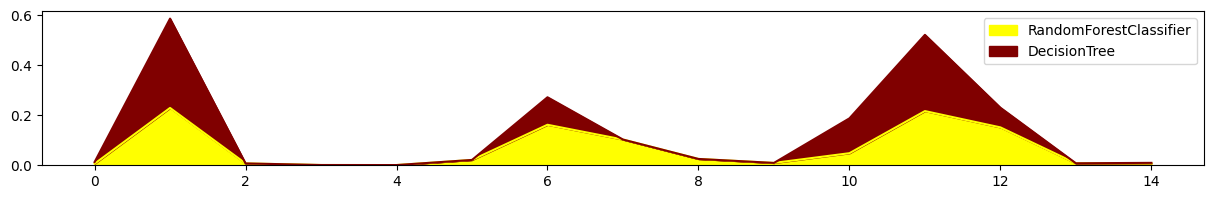

In [50]:
data1.plot(kind="area", figsize = (15,2),color=['yellow','maroon'])

plt.show()

## Conclusion

- From this we come to know that all the 3 algorithms are good but not good enough for modelling, will do the following process
- balance the data
- hyperparameter tuning
- boosting algorithms


# CLASS IMBALANCE TREATMENT

In [51]:
(y_train.value_counts()*100)/len(y_train)

target
0    67.69958
1    32.30042
Name: count, dtype: float64

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train.ravel())

In [53]:
X_train_smote.shape,y_train_smote.shape

((2578, 15), (2578,))

In [54]:
X_test.shape,y_test.shape

((477, 15), (477,))

In [55]:
from collections import Counter
c = Counter(y_train_smote)
print(c)

Counter({1: 1289, 0: 1289})


## Logistic Regression

Accuracy is : 0.70020964360587
Cross Validation Score :  67.38%
ROC_AUC Score :  63.88%
--------------------------------------------------------------------------------


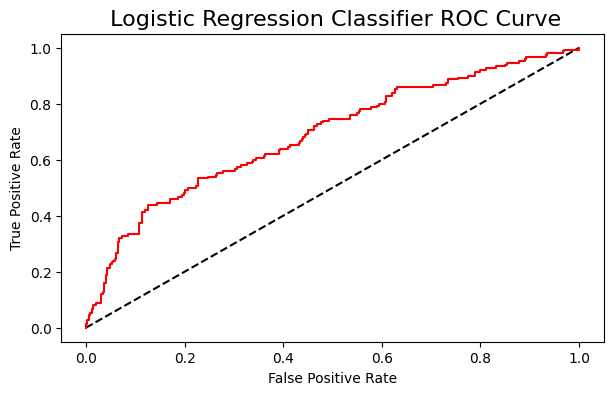

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       327
           1       0.53      0.47      0.50       150

    accuracy                           0.70       477
   macro avg       0.65      0.64      0.64       477
weighted avg       0.69      0.70      0.70       477



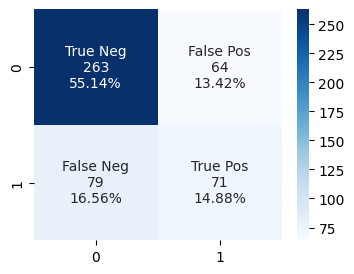

In [56]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()

model(classifier_lr,X_train_smote,y_train_smote,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_lr,X_test,y_test)

## Decision Tree

Accuracy is : 0.9035639412997903
Cross Validation Score :  92.98%
ROC_AUC Score :  90.44%
--------------------------------------------------------------------------------


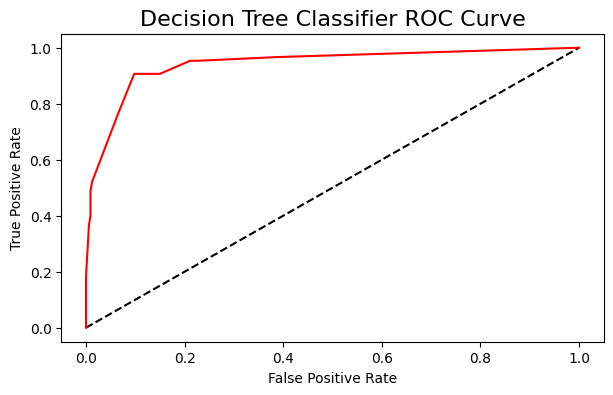

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       327
           1       0.81      0.91      0.86       150

    accuracy                           0.90       477
   macro avg       0.88      0.90      0.89       477
weighted avg       0.91      0.90      0.90       477



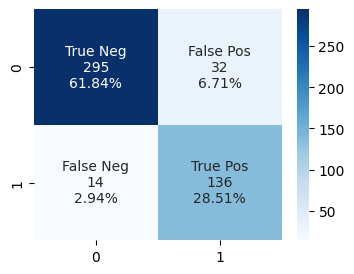

In [57]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

model(classifier_dt,X_train_smote,y_train_smote,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision Tree Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_dt,X_test,y_test)

## Random Forest

Accuracy is : 0.8805031446540881
Cross Validation Score :  94.67%
ROC_AUC Score :  88.94%
--------------------------------------------------------------------------------


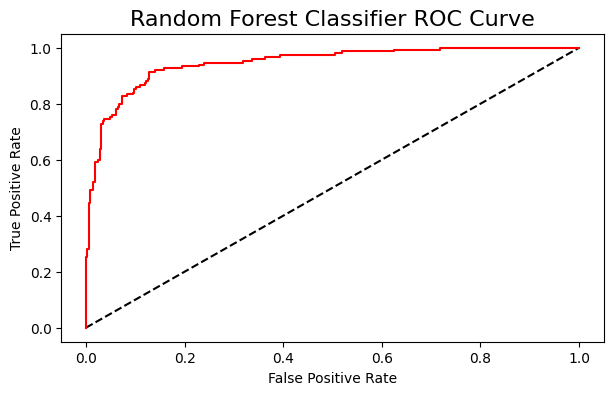

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       327
           1       0.76      0.91      0.83       150

    accuracy                           0.88       477
   macro avg       0.86      0.89      0.87       477
weighted avg       0.89      0.88      0.88       477



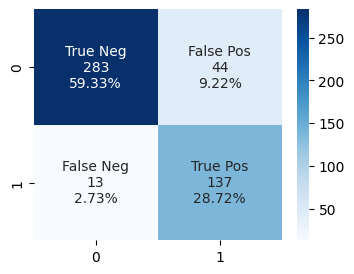

In [58]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

model(classifier_rf,X_train_smote,y_train_smote,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_rf,X_test,y_test)

## Result Table:

In [59]:
data = {
    'ML Algorithm': ['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegressionClassifier'],
    'Accuracy': [88.05, 90.35, 70.02],
    'Cross Validation Score': [94.67, 92.98, 67.38],
    'ROC AUC Score': [88.94, 90.44, 63.88],
    'F1 Score (Churn)': [83, 86, 50]
}

results_df = pd.DataFrame(data)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,RandomForestClassifier,88.05,94.67,88.94,83
1,DecisionTreeClassifier,90.35,92.98,90.44,86
2,LogisticRegressionClassifier,70.02,67.38,63.88,50


## Feature Importance:

In [60]:
rf_clf_imp2 = classifier_rf.feature_importances_
dt_clf_imp2 = classifier_dt.feature_importances_
data2 = pd.DataFrame({'Column_Name':X_train_smote.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'DecisionTree':dt_clf_imp2})

data2

,Column_Name,RandomForestClassifier,DecisionTree
0,Driver_ID,0.006737,0.000907
1,Reportings,0.172844,0.062056
2,Age,0.012423,0.000000
3,Gender,0.018336,0.000000
4,Education_Level,0.011353,0.000000
5,Grade,0.013461,0.000000
6,Total Business Value,0.210034,0.310123
7,Income,0.107786,0.000000
8,Joining Designation,0.024002,0.000000
9,Quarterly Rating,0.021470,0.019224


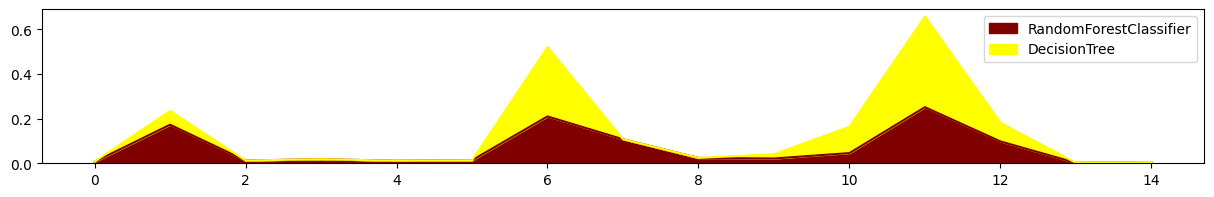

In [61]:
data2.plot(kind="area", figsize = (15,2),color=['maroon','yellow'])

plt.show()

## Conclusion:


- DecisionTreeClassifier appears to be the most suitable model for the given task, as it consistently outperforms other models across all performance metrics.
- RandomForestClassifier also performs well and could be considered as an alternative to DecisionTreeClassifier, especially if ensemble methods are preferred for improved generalization.
- LogisticRegressionClassifier, while having the lowest scores, might still have its use cases, particularly when interpretability and simplicity are crucial.

# Hyperparameter Tunning :

## Decision Tree:

In [62]:
from sklearn.model_selection import GridSearchCV

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Training a new Decision Tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train_smote, y_train_smote)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=10)

Accuracy: 0.8805031446540881
Cross Validation Score :  90.71%
ROC_AUC Score :  85.87%
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       327
           1       0.82      0.80      0.81       150

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



<Axes: >

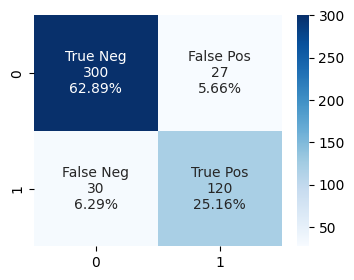

In [73]:
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(best_dt_classifier,X_train_smote,y_train_smote,cv = cv,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))

print(classification_report(y_test,y_pred))


plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_pred)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')


## Random Forest:

In [64]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Training a new Random Forest model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train_smote, y_train_smote)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(max_depth=20, min_samples_split=5)

Accuracy: 0.9056603773584906
Cross Validation Score :  97.28%
ROC_AUC Score :  89.51%
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       327
           1       0.84      0.87      0.85       150

    accuracy                           0.91       477
   macro avg       0.89      0.90      0.89       477
weighted avg       0.91      0.91      0.91       477



<Axes: >

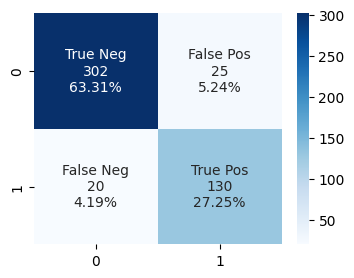

In [74]:
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(best_rf_classifier,X_train_smote,y_train_smote,cv = cv,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))

print(classification_report(y_test,y_pred))

plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_pred)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

In [75]:
data = {
    'ML Algorithm': ['RandomForestClassifier', 'DecisionTreeClassifier'],
    'Accuracy': [90.05, 88.05],
    'Cross Validation Score': [97.28, 90.71],
    'ROC AUC Score': [89.51, 85.87],
    'F1 Score (Churn)': [85, 81]
}

results_df = pd.DataFrame(data)
results_df

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score,F1 Score (Churn)
0,RandomForestClassifier,90.05,97.28,89.51,85
1,DecisionTreeClassifier,88.05,90.71,85.87,81


# Conclusion:

- After hyperparameter tuning, the RandomForestClassifier shows improved performance across all metrics compared to the DecisionTreeClassifier.
- It achieves higher accuracy (90.05%) and Cross Validation Score (97.28%), indicating better generalization and robustness.
- The ROC AUC Score (89.51%) is higher, suggesting improved discrimination between classes.
- The F1 Score (Churn) has also increased to 85, indicating better balance between precision and recall for the churn class.
- Overall, the RandomForestClassifier outperforms the DecisionTreeClassifier after hyperparameter tuning, demonstrating higher accuracy, better generalization, and improved performance across multiple metrics. Therefore, the RandomForestClassifier is preferred for this classification task.

# Boosting: XGBoost

In [67]:
from xgboost import XGBClassifier
import xgboost

In [68]:
model_bost = XGBClassifier()
model_bost.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy is : 0.9056603773584906
Cross Validation Score :  97.30%
ROC_AUC Score :  89.33%
--------------------------------------------------------------------------------


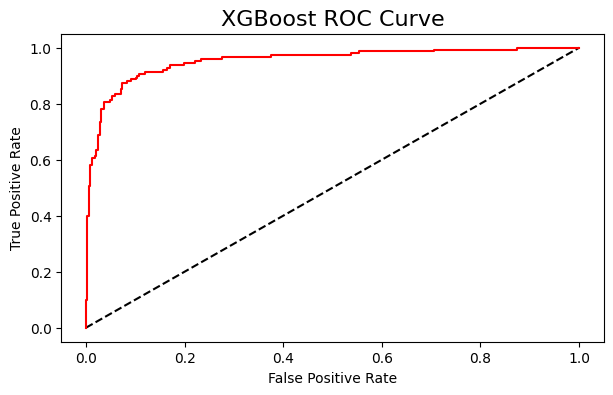

--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       327
           1       0.84      0.86      0.85       150

    accuracy                           0.91       477
   macro avg       0.89      0.89      0.89       477
weighted avg       0.91      0.91      0.91       477



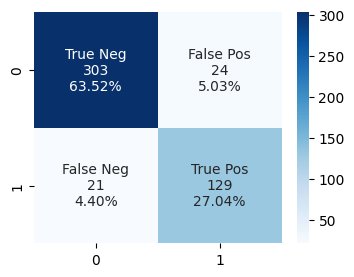

In [78]:
classifier_XGB = XGBClassifier()

model(classifier_XGB,X_train_smote,y_train_smote,X_test,y_test)

print('-'*80)

#plotting roc curve
y_pred_prob =classifier_XGB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve',fontsize=16)
plt.show();

print('-'*80)

model_evaluation(classifier_XGB,X_test,y_test)

## Hyperparamter Tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV
params = {
        "n_estimators": [150,200, 250, 300],
        "max_depth" : [2, 3, 4, 5, 7],
        "learning_rate": [0.01, 0.02, 0.05, 0.07],
        'subsample': [0.4, 0.5,0.6, 0.8],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)
random_search = RandomizedSearchCV( xgb, param_distributions = params,scoring='accuracy',n_jobs=-1,cv=3)

random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=20, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.02, 0.05,
                                                          0.07],
                                        'max_depth': [2, 3, 4, 5, 7],
                                        'n_estimators': [150, 200, 250, 300],
                                        'subsample': [0.4, 0.5, 0.6, 0.8]},
                   scoring='accuracy')

In [71]:
random_search.best_params_

{'subsample': 0.5,
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

Accuracy: 0.9140461215932913
Cross Validation Score :  97.38%
ROC_AUC Score :  90.48%
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       327
           1       0.85      0.88      0.87       150

    accuracy                           0.91       477
   macro avg       0.90      0.90      0.90       477
weighted avg       0.92      0.91      0.91       477



<Axes: >

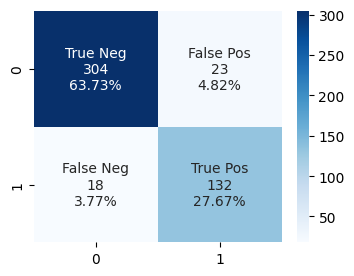

In [76]:
y_pred = random_search.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(random_search,X_train_smote,y_train_smote,cv = cv,scoring = 'roc_auc').mean()))
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))

print(classification_report(y_test,y_pred))

plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test,y_pred)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

# Model Performance:

XGBoost and Random Forest Classifier stands out as the best-performing model overall, with consistently high accuracy across all metrics for both predicting churn and non-churn.